In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import cv2
from PIL import Image
import numpy as np

import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
image_directory = '/content/drive/MyDrive/Skin_Conditions/'
SIZE = 224
dataset = []  # List for storing images
label = []    # List for storing labels

# Load ACNE Images
healthy_images = os.listdir(image_directory + 'Acne/')
for image_name in healthy_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':  # Safely check for jpg
        image = cv2.imread(image_directory + 'Acne/' + image_name)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)

# Load Carcinoma Images
earlyblight_images = os.listdir(image_directory + 'Carcinoma/')
for image_name in earlyblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Carcinoma/' + image_name)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)

# Load ECZEMA Images
lateblight_images = os.listdir(image_directory + 'Eczema/')
for image_name in lateblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Eczema/' + image_name)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(2)


# Load Keratosis Images
lateblight_images = os.listdir(image_directory + 'Keratosis/')
for image_name in lateblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Keratosis/' + image_name)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(3)


# Load Milia Images
lateblight_images = os.listdir(image_directory + 'Milia/')
for image_name in lateblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Milia/' + image_name)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(4)



# Load Rosacea Images
lateblight_images = os.listdir(image_directory + 'Rosacea/')
for image_name in lateblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Rosacea/' + image_name)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(5)

# Convert lists to NumPy arrays
dataset = np.array(dataset)
labels = np.array(label)

# Check the shape of the dataset and labels
print("Dataset shape:", dataset.shape)
print("Labels shape:", labels.shape)


Dataset shape: (2414, 224, 224, 3)
Labels shape: (2414,)


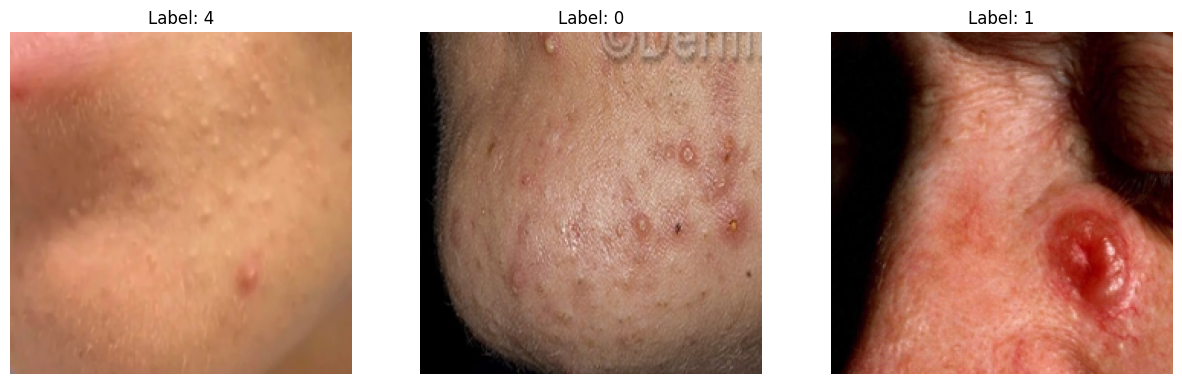

In [3]:
# Set up the figure and the subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Loop to display 3 random images
for i in range(3):
    num = random.randint(0, len(dataset) - 1)

    # Display the image in the corresponding subplot
    axs[i].imshow(np.reshape(dataset[num], (224, 224, 3)))

    # Set the title to show the label for this image
    axs[i].set_title(f"Label: {labels[num]}")

    # Remove the axes ticks for a cleaner look
    axs[i].axis('off')

# Show the plot
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 42)

# Convert y_train and y_test to NumPy arrays
#y_train = np.array(y_train)
#y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

(1931, 224, 224, 3)
(483, 224, 224, 3)


In [5]:
X_train = X_train/255
X_test = X_test/ 255


In [6]:
print(y_train[5])
print(y_train[15])
print(y_train[7])
print(y_train[55])

2
0
3
2


In [7]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [8]:
print(y_train_cat[5])
print(y_train_cat[15])
print(y_train_cat[7])
print(y_train_cat[55])

[0. 0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0.]


In [9]:
#using VGG16
# Step 1: Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Step 3: Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Adjust for the number of classes

# Step 4: Create the complete model
model2 = Model(inputs=base_model.input, outputs=predictions)
model2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,139,014 (80.64 MB)

 Trainable params: 6,424,326 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(X_train, y_train_cat, batch_size=32, verbose=2, epochs=50, validation_data=(X_test, y_test_cat), shuffle=False)

Epoch 1/50
61/61 - 33s - 543ms/step - accuracy: 0.5603 - loss: 1.2055 - val_accuracy: 0.6646 - val_loss: 0.8936
Epoch 2/50
61/61 - 12s - 196ms/step - accuracy: 0.7602 - loss: 0.7003 - val_accuracy: 0.7308 - val_loss: 0.7592
Epoch 3/50
61/61 - 21s - 341ms/step - accuracy: 0.8353 - loss: 0.5267 - val_accuracy: 0.7412 - val_loss: 0.7180
Epoch 4/50
61/61 - 21s - 338ms/step - accuracy: 0.8674 - loss: 0.4271 - val_accuracy: 0.7743 - val_loss: 0.6354
Epoch 5/50
61/61 - 21s - 339ms/step - accuracy: 0.8990 - loss: 0.3561 - val_accuracy: 0.7930 - val_loss: 0.5621
Epoch 6/50
61/61 - 23s - 383ms/step - accuracy: 0.9202 - loss: 0.3071 - val_accuracy: 0.8137 - val_loss: 0.5346
Epoch 7/50
61/61 - 18s - 297ms/step - accuracy: 0.9311 - loss: 0.2747 - val_accuracy: 0.8385 - val_loss: 0.4942
Epoch 8/50
61/61 - 20s - 331ms/step - accuracy: 0.9368 - loss: 0.2539 - val_accuracy: 0.8282 - val_loss: 0.4820
Epoch 9/50
61/61 - 13s - 213ms/step - accuracy: 0.9415 - loss: 0.2361 - val_accuracy: 0.8323 - val_loss:

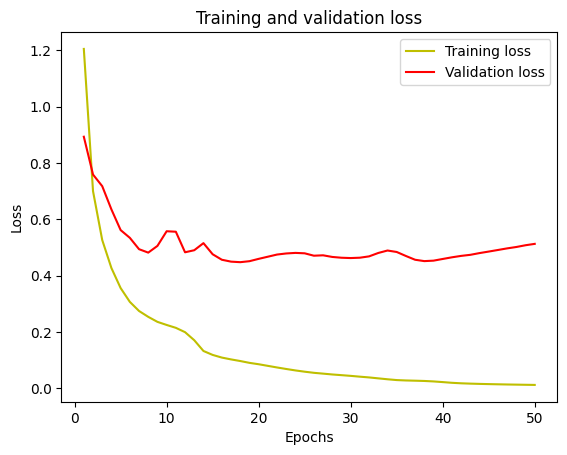

In [11]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

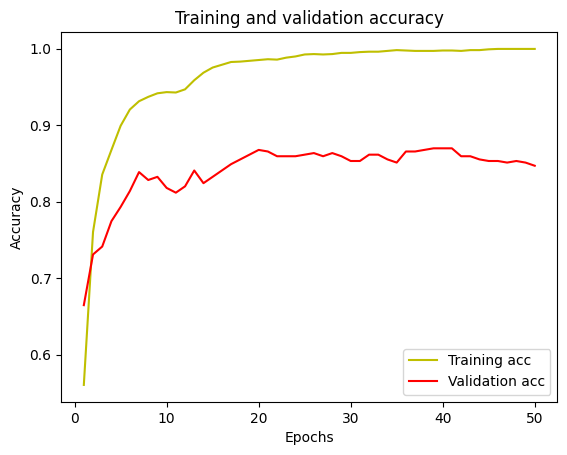

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Step 1: Make predictions on the test set
y_pred_probs = model2.predict(X_test)

# Step 2: Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Use y_test directly if it's a 1D array of class labels
y_true = y_test  # Directly assign if y_test is 1D

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Step 5: Generate a classification report
report = classification_report(y_true, y_pred, target_names=['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Rosacea'])

# Output results
print("Accuracy: ", accuracy)
print("\nClassification Report:\n", report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step
Accuracy:  0.8467908902691511

Classification Report:
               precision    recall  f1-score   support

        Acne       0.86      0.63      0.73        78
   Carcinoma       0.89      0.94      0.92        88
      Eczema       0.88      0.70      0.78        63
   Keratosis       0.89      0.91      0.90        90
       Milia       0.92      0.97      0.94        93
     Rosacea       0.66      0.86      0.74        71

    accuracy                           0.85       483
   macro avg       0.85      0.83      0.83       483
weighted avg       0.86      0.85      0.84       483



Confusion Matrix:
 [[49  2  5  3  3 16]
 [ 0 83  0  3  0  2]
 [ 2  0 44  2  2 13]
 [ 0  7  0 82  1  0]
 [ 1  0  1  0 90  1]
 [ 5  1  0  2  2 61]]


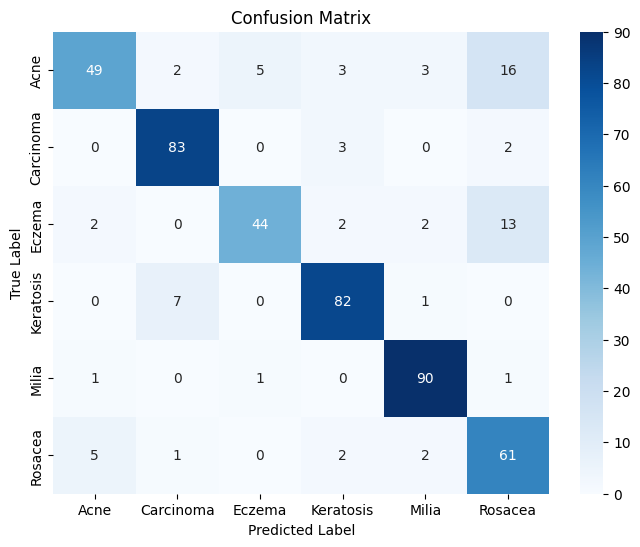

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true and y_pred have already been defined

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Rosacea'],
            yticklabels=['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Rosacea'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


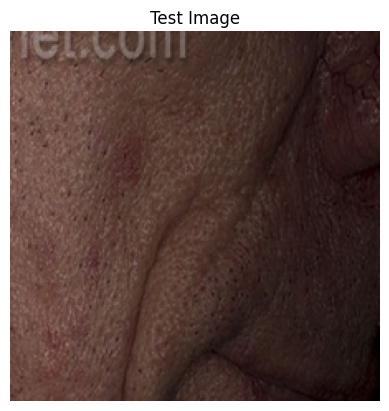

Predicted label: Rosacea
Actual label: Rosacea


In [19]:
# Define the mapping from label index to class name
label_dict = {
    0: "Acne",
    1: "Carcinoma",
    2: "Eczema",
    3: "Keratosis",
    4: "Milia",
    5: "Rosacea"
}

# Randomly pick an image index from X_test
n = random.randint(0, len(X_test) - 1)

# Select and prepare the image
img = X_test[n]
input_img = np.expand_dims(img, axis=0)

# Predict
prediction = model2.predict(input_img)
predicted_class = np.argmax(prediction)

# Plot the image
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

# Print the prediction results
print(f"Predicted label: {label_dict[predicted_class]}")
print(f"Actual label: {label_dict[y_test[n]]}")